# *Data Anlaysis*

## Today's Outline
- Full Data Analysis Case-study
    - Car Price Prediction

## Case-study: Car Price Prediction ML & Streamlit

This dataset can be found on Kaggle:
https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Data Pre-proccesing and Exploring Data

In [3]:
data = pd.read_csv('car_price_prediction.csv')
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
data['Engine volume']=data['Engine volume'].str.replace(".","").str.replace('Turbo', '')
data['Engine volume']=data['Engine volume'].astype("float64")

In [5]:
data['Levy']=data['Levy'].replace("-","0")
data['Levy']=data['Levy'].astype("int64")

In [6]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,35.0,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,13.0,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,25.0,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,13.0,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,20.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,24.0,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [7]:
data['Mileage']=data['Mileage'].str.replace("km","")
data['Mileage']=data['Mileage'].astype("int64")

In [8]:
time =dtime = datetime.datetime.now()
data['Age']=time.year-data['Prod. year']

In [9]:
data.drop(['ID', 'Doors', 'Prod. year'], axis=1 , inplace=True)

In [10]:
data.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
Age                 0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.reset_index(inplace=True)
if 'index' in data.columns :
    data.drop (['index'],axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15725 entries, 0 to 15724
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              15725 non-null  int64  
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Category          15725 non-null  object 
 5   Leather interior  15725 non-null  object 
 6   Fuel type         15725 non-null  object 
 7   Engine volume     15725 non-null  float64
 8   Mileage           15725 non-null  int64  
 9   Cylinders         15725 non-null  float64
 10  Gear box type     15725 non-null  object 
 11  Drive wheels      15725 non-null  object 
 12  Wheel             15725 non-null  object 
 13  Color             15725 non-null  object 
 14  Airbags           15725 non-null  int64  
 15  Age               15725 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memor

data_num=data.select_dtypes(exclude='object')
for col in data_num:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    high = q3+iqr*1.5
    low = q1-iqr*1.5
    outliers = ((data_num[col] < low)|(data_num[col] > high)).sum()
    precentage = round(100*outliers/data.shape[0],2)
    print(f"outliers in {col} are  {outliers} ||  {precentage}")
    data.loc[data[col]<low]=np.nan
    data.loc[data[col]>high]=np.nan
    data=data.dropna(axis=0)

In [15]:
data.reset_index(inplace=True)
if 'index' in data.columns :
    data.drop (['index'],axis=1,inplace=True)

In [16]:
top_cars = data.Manufacturer.value_counts().sort_values(ascending=False)[:10]

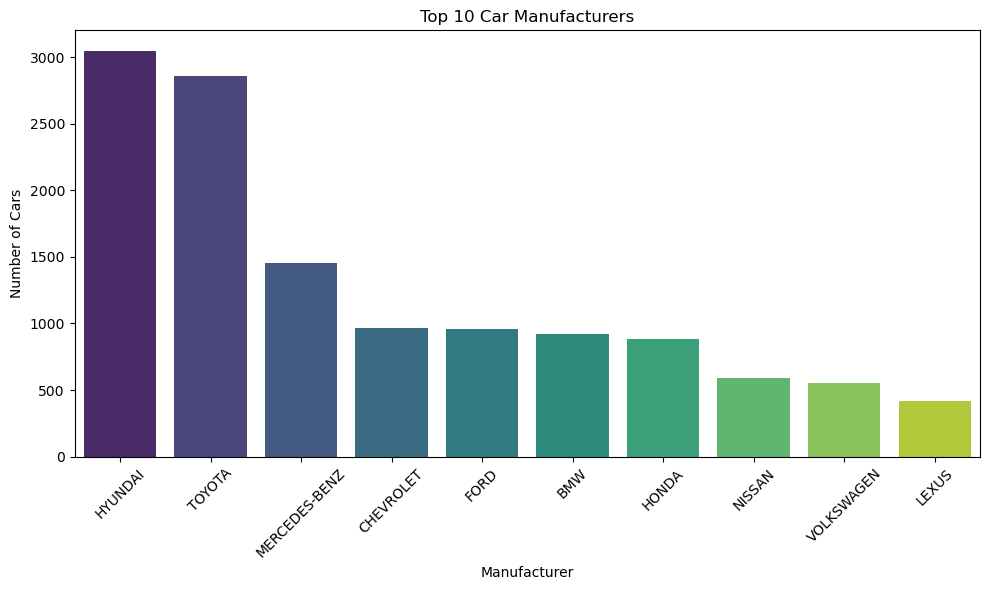

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cars.index, y=top_cars.values, palette="viridis")
plt.title('Top 10 Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### a correlation between the price of a car and its mileage?

In [18]:
correlation_coefficient = data['Price'].corr(data['Mileage'])
correlation_coefficient

-0.0020106637530234307

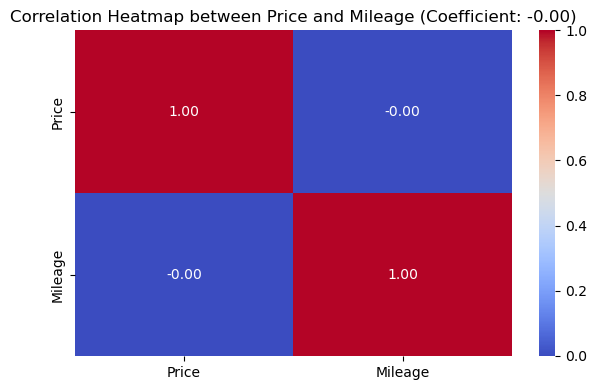

In [19]:
price_mileage_df = data[['Price', 'Mileage']]
correlation_matrix = price_mileage_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Price and Mileage (Coefficient: {:.2f})'.format(correlation_coefficient))
plt.tight_layout()

#### Which manufacturer produces the most expensive cars on average?

In [20]:
average_prices = data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)[:10]
average_prices.round(2)

Manufacturer
LAMBORGHINI     872946.00
BENTLEY         197574.50
OPEL             73474.89
FERRARI          66955.50
LAND ROVER       54807.19
ASTON MARTIN     54000.00
TESLA            53941.00
PORSCHE          48406.69
JAGUAR           34408.79
HUMMER           31210.60
Name: Price, dtype: float64

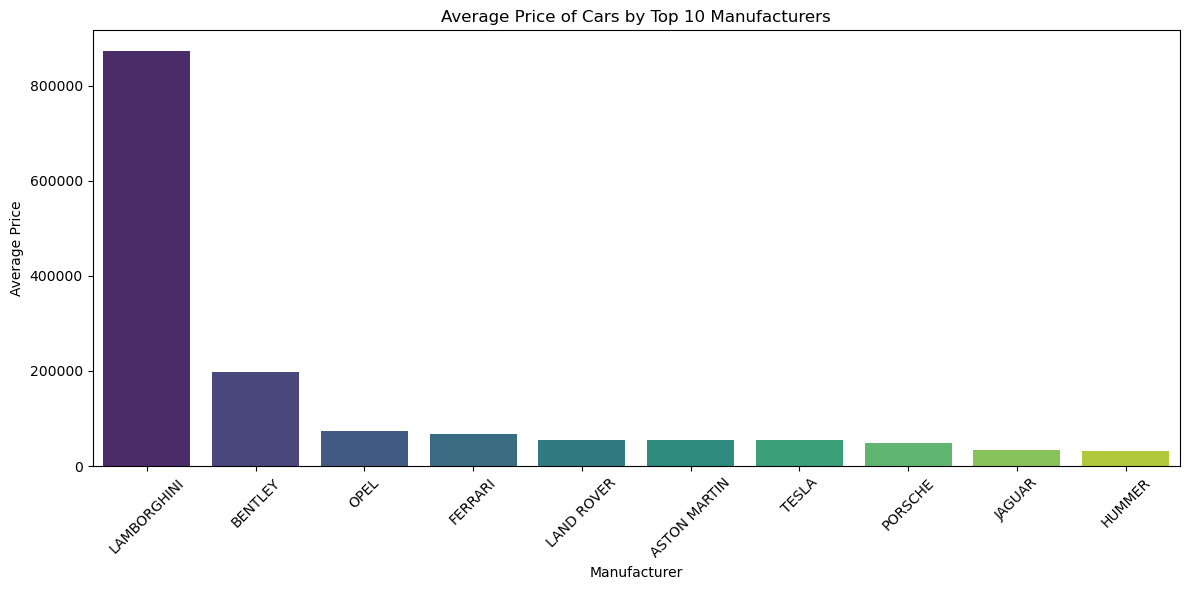

In [21]:
average_prices = average_prices.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Price', data=average_prices, palette='viridis')
plt.title('Average Price of Cars by Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
category_distribution = data['Category'].value_counts()

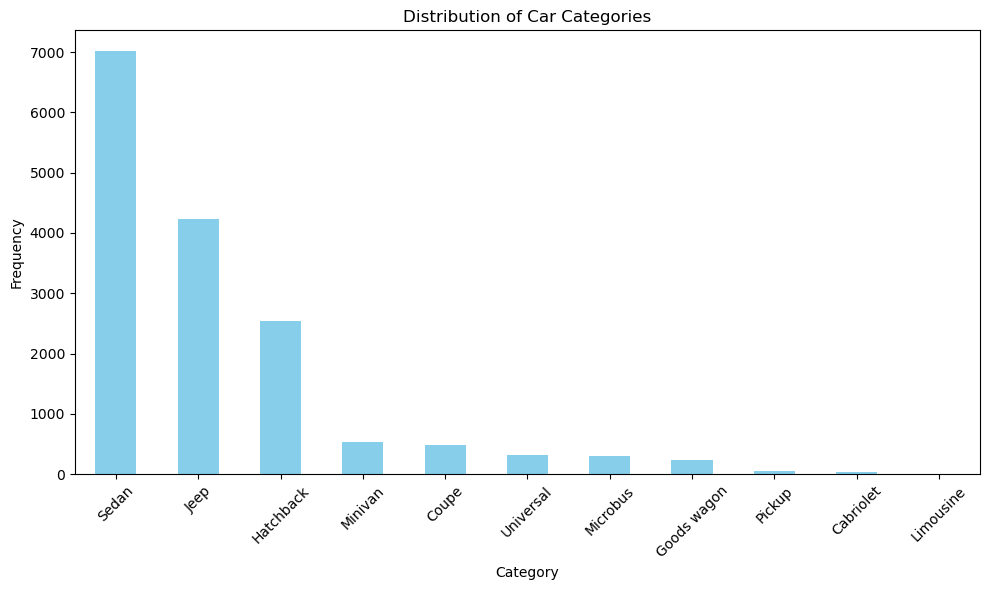

In [23]:
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Transform Data

In [24]:
lb = LabelEncoder()

In [25]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')
for i in range (0 , obj.shape[1]):
    obj.iloc[ : ,i]= lb.fit_transform(obj.iloc[ : ,i])
data= pd.concat([obj,non_obj],axis=1)

In [26]:
sc = StandardScaler()

In [27]:
data['Model'] = sc.fit_transform(data[['Model']])
data['Mileage'] = sc.fit_transform(data[['Mileage']])
data['Age'] = sc.fit_transform(data[['Age']])


# Create model

In [29]:
X = data.drop(['Price',], axis=1 )
y = data['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = KNeighborsClassifier()
model6 = XGBClassifier()
model7 = SVC()
model8 = GradientBoostingClassifier()

In [32]:
def pred(model):
    model.fit(X_train , y_train)
    y_predict= model.predict(X_test)
    cm=confusion_matrix(y_predict, y_test , normalize='true') 
    ConfusionMatrixDisplay(confusion_matrix=cm , display_labels = model.classes_ ).plot()
    print(classification_report(y_predict, y_test))

In [ ]:
pred(model1)

In [ ]:
pred(model2)

In [ ]:
pred(model3)

In [ ]:
pred(model4)

In [ ]:
pred(model5)

In [ ]:
pred(model6)

In [ ]:
pred(model7)

In [ ]:
pred(model8)